## ARMA 모델
AR 모델과 MA 모델의 결합.<br>
시계열 데이터의 자기상관성과 이동평균성을 모두 고려하여 데이터를 설명하는 모델.
이전 p개의 시점의 값과 이전 q개의 오차항의 선형 조합으로 현재 시점의 값을 설명한다.<br>
AR 모델은 시계열 데이터의 추세를 설명 가능, 잡음 설명 가능, 자기상관성과 이동평균성을 동시에 고려하므로 다양한 시계열 데이터 패턴을 모델링 할 수 있다. 또, 백색 잡음 가정을 만족하는 데이터에 적합하다. 파라미터는 최소자승법, 최대 가능도 추정 등의 통계적 방법을 사용하여 추적.<br>
AR 모델, MA 모델, 차분 개념을 결합한 시계열 모델

#### ARMA 모델의 파라미터 추정
- 초기 추정치 설정 : ARMA 모델의 차수(p, q)를 결정하고 초기 파라미터 추정치를 설정한다.
- 최대 가능도 추정 : 초기 추정치를 기반으로 주어진 데이터의 로그 가능도 함수를 정의하고, 이를 최대화하는 파라미터 값을 찾는다. 이를 위해 수치적 최적화 알고리즘을 사용할 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# 시계열 데이터 생성
np.random.seed(0)
n = 100 # 데이터 포인트 수
ar_params = [0.7] # 자기회귀 계수
ma_params = [0.4, -0.2] # 이동평균 계수
residuals = np.random.normal(0, 1, n) # 잔차 생성

# ARMA(1, 2) 모델 생성
data = [0, 0]  # 초기값 설정
for i in range(2, n) :
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
    data.append(ar_term+ ma_term + residuals[i])
    
# 데이터프레임 생성
df = pd.DataFrame({'Value' : data})

# 데이터 확인
print(df)

       Value
0   0.000000
1   0.000000
2   0.785990
3   3.102550
4   4.739953
..       ...
95  2.160229
96  1.734016
97  2.862567
98  2.842957
99  2.085650

[100 rows x 1 columns]


ARMA(1, 2) 에서 (1, 2)는 모델의 차수를 나타냄. 첫 번째 숫자는 AR 모델의 차수, 두 번째 숫자는 MA 모델의 차수<br>
ARMA(p, q) 모델에서 p는 AR 모델의 차수를 나타내며, q는 MA 모델의 차수를 나타낸다. 이러한 모델은 자기 회귀 및 이동평균의 조합으로 이루어져 있어 시계열 데이터를 모델링하고 예측하는 데 사용된다.

In [2]:
# ARMA(1, 2) 모델 적합
model = ARIMA(df['Value'], order = (1, 0, 2))
# order = (1, 0, 2)는 AR, 차분, MA의 차수 의미. 여기서는 AR(1), MA(2) 모델을 사용하며, 차분은 수행하지 않음
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -140.937
Date:                Mon, 05 Jun 2023   AIC                            291.874
Time:                        01:17:20   BIC                            304.900
Sample:                             0   HQIC                           297.146
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1564      0.510      0.307      0.759      -0.842       1.155
ar.L1          0.7647      0.129      5.934      0.000       0.512       1.017
ma.L1          0.3757      0.158      2.382      0.0

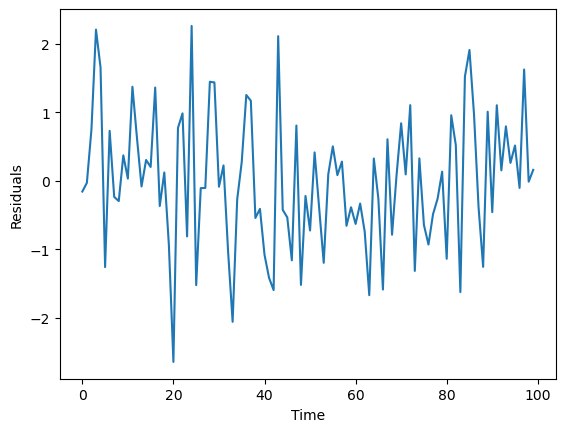

In [3]:
# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')  # 잔차
plt.show()